#Assignment #1
##Machine Learning - Classification
###Rhichard Koh

3. Data Analysis: Even as a ML engineer you will have to perform some kind
of data analysis.
Analyse the crime.csv dataset. The dataset shows the crimes happened in a
city say “XYZ” over a period of time.
The dataset contains the following variables:
Year, Population, Murder, Forcible_Rape, Robbery, Aggravated_assault
Burglary, Larceny_Theft, Vehicle_Theft.
Violent_Crime is the sum of Murder, Forcible_Rape, Robbery and
Aggravated_assault
Property_Crime is the sum of Burglary, Larceny_Theft and Vehicle_Theft
Find the most dangerous and the safest decade to live in this country? ----(5
points)

In [3]:
#3
import pandas as pd

crime = pd.read_csv('crime.csv')

Violent_Crime includes Murder, Forcible_Rape, Robbery and Aggravated_assault and Property_Crime includes Burglary, Larceny_Theft and Vehicle_Theft therefore I can just sum both of these columns instead of individually adding all of the crimes.

In [3]:
#3
crime['total crime'] = crime['Violent_Crime'] + crime['Property_Crime']

I am classifying decades from the 0th to the 9th of each decade and storing their sum in a decade variable relative to the sum of each decade. for example sixties is the total crime from the years 1960 - 1969.

In [4]:
#3
sixties = crime.loc[crime['Year'].between(1960,1969)]['total crime'].sum()
seventies = crime.loc[crime['Year'].between(1970,1979)]['total crime'].sum()
eighties = crime.loc[crime['Year'].between(1980,1989)]['total crime'].sum()
nineties = crime.loc[crime['Year'].between(1990,1999)]['total crime'].sum()
twothousands = crime.loc[crime['Year'].between(2000,2009)]['total crime'].sum()
twothousandstens = crime.loc[crime['Year'].between(2010,2019)]['total crime'].sum()

In [5]:
#3
print(f'sixties: {sixties}')
print(f'seventies: {seventies}')
print(f'eighties: {eighties}')
print(f'nineties: {nineties}')
print(f'twothousands: {twothousands}')
print(f'twothousandstens: {twothousandstens}')

sixties: 49295830
seventies: 100991730
eighties: 131123228
nineties: 136580547
twothousands: 114912425
twothousandstens: 50167967


created a dictionary that stores the decade key and the total crime value

In [6]:
#3
kvmap = {
    '60s':sixties,
    '70s':seventies,
    '80s':eighties,
    '90s':nineties,
    '00s':twothousands,
    '10s':twothousandstens
}

sorted the dictionary based on the values from least to greatest

In [7]:
#3
sortedmap = dict(sorted(kvmap.items(), key=lambda x: x[1]))

In [8]:
#3
sortedmap

{'60s': 49295830,
 '10s': 50167967,
 '70s': 100991730,
 '00s': 114912425,
 '80s': 131123228,
 '90s': 136580547}

Therefore, the safest decade to live in the 60s.
Therefore, the most dangerous decade to live in the 90s.

4. Data Preparation: You are given a student_records.csv dataset. The dataset shows whether a student will receive a recommendation letter or not from the college based on several attributes.
Data preparation is the process of cleaning and transforming a dataset to make predictions accurately through using ML algorithms. Perform data preparation on student_record.csv so that it can be used to later build a Logistic Regression model for predicting if a student will receive a recommendation or not? {Assume student_records.csv is your training dataset. Students are not required to do the model building, They are just to perform Data Preparation} ----(5 points)

In [144]:
#4
student = pd.read_csv('student_records.csv')

check to see if we have an even amount of yes and no in the y column

<AxesSubplot:xlabel='Recommend', ylabel='count'>

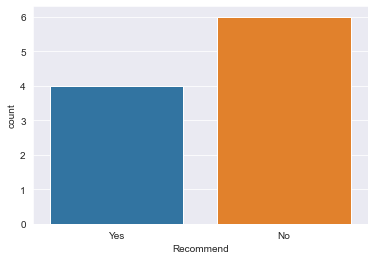

In [145]:
#4
import seaborn as sns
import numpy as np
sns.countplot(data=student, x='Recommend')

we have more No in our y column versus our Yes. Therefore, I will change the Nan in the recommend column into 'Yes' to balance the data.

In [146]:
#4
student.Recommend = student.Recommend.fillna('Yes')

The Name column is insignificant to the model therefore, we can just drop it.

In [147]:
#4
student = student.drop(['Name'], axis=1)
student

,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,A,Yes,90.0,85,Yes
1,C,N,85.0,51,Yes
2,F,No,10.0,17,No
3,B,Yes,75.0,71,No
4,E,No,20.0,30,No
5,A,Yes,92.0,79,Yes
6,B,Yess,60.0,59,No
7,C,Ye,75.0,33,No
8,A,yes,NaN,82,Yes
9,E,No,25.0,30,No


Need to change all the incorrectly typed yes and no in the obedient column into 'Yes' or 'No'

In [148]:
#4
student.Obedient = student.Obedient.apply(lambda x: 'No' if 'N' in x else 'Yes')

found the mean of the research score col when overall grade is A and the student is obedient

In [149]:
#4
researchscoremean = student.loc[(student['OverallGrade'] == 'A') & (student['Obedient'] == 'Yes')].ResearchScore.mean()

filled the missing value of the ResearchScore column with the mean of the "student['OverallGrade'] == 'A') & (student['Obedient'] == 'Yes'" condition.

In [150]:
#4
student.ResearchScore = student.ResearchScore.fillna(researchscoremean)

created a map that converts 'Yes' to 1 and 'No' to 0 then mapped the Obedient and Recommend columns. Also created a map for overall grade converting ABCDEF into 543210 then mapping overall grade so that it is encoded.

In [151]:
#4
key = {'Yes': 1, 'No': 0}
key2 = {
    'A':5,
    'B':4,
    'C':3,
    'D':2,
    'E':1,
    'F':0
}

student.Obedient = student.Obedient.map(key)
student.Recommend = student.Recommend.map(key)
student.OverallGrade = student.OverallGrade.map(key2)

In [152]:
#4
student

,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,5,1,90.0,85,1
1,3,0,85.0,51,1
2,0,0,10.0,17,0
3,4,1,75.0,71,0
4,1,0,20.0,30,0
5,5,1,92.0,79,1
6,4,1,60.0,59,0
7,3,1,75.0,33,0
8,5,1,91.0,82,1
9,1,0,25.0,30,0


scaling the data with the min max scaler.

In [153]:
#4
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_student = scaler.fit_transform(student)

In [154]:
#4
scaled_student

array([[1.        , 1.        , 0.94117647, 1.        , 1.        ],
       [0.6       , 0.        , 0.88235294, 0.5       , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.8       , 1.        , 0.76470588, 0.79411765, 0.        ],
       [0.2       , 0.        , 0.11764706, 0.19117647, 0.        ],
       [1.        , 1.        , 0.96470588, 0.91176471, 1.        ],
       [0.8       , 1.        , 0.58823529, 0.61764706, 0.        ],
       [0.6       , 1.        , 0.76470588, 0.23529412, 0.        ],
       [1.        , 1.        , 0.95294118, 0.95588235, 1.        ],
       [0.2       , 0.        , 0.17647059, 0.19117647, 0.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ]])